# Kaggle Titanic Data Set

In [388]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [389]:
# Import Data
raw_data = pd.read_csv('/Users/jimmy/Desktop/Titanic/train.csv')
data = raw_data.copy(deep = False)
Responses = data['Survived']
del data['PassengerId']
del data['Survived']
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Preliminary Data Analysis

#### Overall Analysis

In [390]:
raw_data['Survived'].mean()

0.3838383838383838

#### Chances for survival overall were 39% 

In [391]:
raw_data.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


#### There is a clear correlation between passenger class and metrics such as survival, age, fare paid, and group size

### PDA of initial variables

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

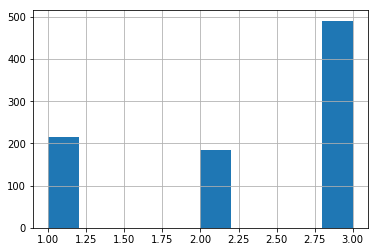

In [392]:
# Passenger class
data.Pclass.hist()

#### Three classes, Pclass 3 over represented in group

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

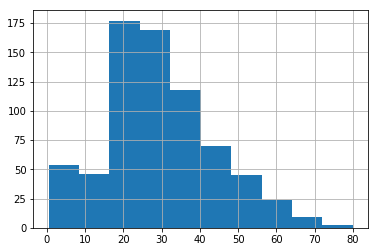

In [393]:
# Passenger Age
data.Age.hist()

#### Distribution shows two possible groups (younger than ~18 versus adults)

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

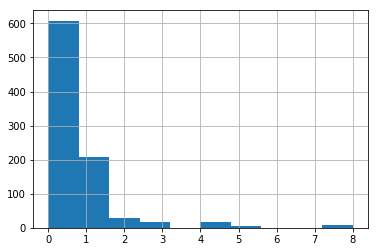

In [394]:
# Siblings
data.SibSp.hist()

#### Again, two possible distributions 0 or 1 family members versus larger families

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

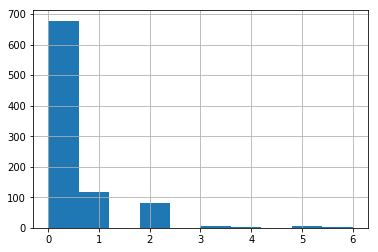

In [395]:
data.Parch.hist()

#### Similar to SibSp distribution...

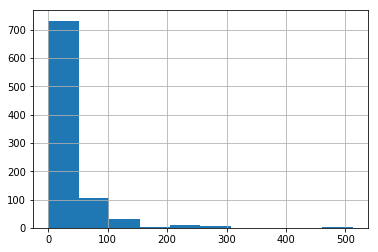

In [396]:
data.Fare.hist()

#### Most Fares were below 50 and the vast majority were below 100

Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

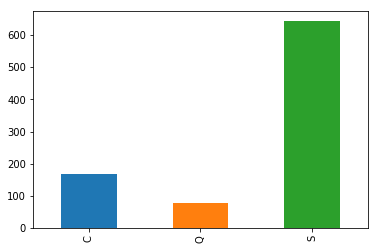

In [397]:
Embarked= pd.get_dummies(data['Embarked'])
Embarked_sum = Embarked.sum(axis=0)
Embarked_sum.plot.bar()

#### Most customers embarked from Southampton

##### Does the point of where people embarked matter for survival? 

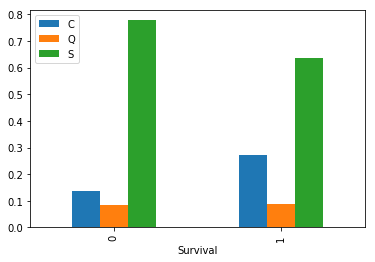

In [398]:
Embarked['Survival'] = Responses
Embarked.groupby('Survival').mean().plot.bar()

#### Lets normalize by the initial group number to check a little further

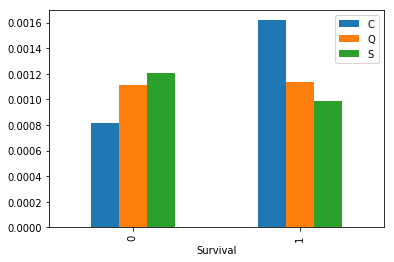

In [399]:
normalized_embark = Embarked.groupby('Survival').mean()/Embarked_sum 
normalized_embark.plot.bar()

#### It appears that those who embarked from Cherborg had a better chance of survival than those from Southampton.  I won't go into further analysis here, but likely there were more first class customers boarding at this destination in France... 

### This was the easy analysis. Further analysis will involve deriving additional insight from the information we are given! First, lets analyze the cabin assignments.

Cabin assignments are all made up of a letter and a number. From research (https://www.encyclopedia-titanica.org/titanic-deckplans/a-deck.html) it appears that cabin decks range from A through potentially G, where A will be the highest/ top deck and each letter following will descend in the ship. For our analysis, I will separate the cabin deck from the numbers as a preliminary step.

In [400]:
# Find deck letter 
data['Deck'] = data['Cabin'].astype(str).str[0]
data['Deck'] = data['Deck'].replace('n',np.NaN)
data['Survival'] = Responses

In [401]:
data.groupby('Deck').mean()

,Pclass,Age,SibSp,Parch,Fare,Survival
Deck,,,,,,
A,1.000000,44.833333,0.133333,0.133333,39.623887,0.466667
B,1.000000,34.955556,0.361702,0.574468,113.505764,0.744681
C,1.000000,36.086667,0.644068,0.474576,100.151341,0.593220
D,1.121212,39.032258,0.424242,0.303030,57.244576,0.757576
E,1.312500,38.116667,0.312500,0.312500,46.026694,0.750000
F,2.384615,19.954545,0.538462,0.538462,18.696792,0.615385
G,3.000000,14.750000,0.500000,1.250000,13.581250,0.500000
T,1.000000,45.000000,0.000000,0.000000,35.500000,0.000000


#### Deck location seems to play a role in survival, although not by class... I would have guessed that A deck would have had the highest survival, but it had the lowest.  From diagrams of the ship, all A cabins appear to be toward the back of the ship.  Maybe the number of the cabin plays a role as well?

In [402]:
data['Cabin'] = data['Cabin'].replace('nan',np.NaN)
data['temp'] = data['Cabin'].str.extract('(\d+)', expand = False)
data['Cabnum'] = data['temp'].astype(str).str[0:3]
data['Cabnum'] = data['Cabnum'].replace('an', np.NaN)
data['Cabnum'] = pd.to_numeric(data['Cabnum'], errors='coerce')
del data['temp']

In [403]:
data.groupby('Deck').mean()

,Pclass,Age,SibSp,Parch,Fare,Survival,Cabnum
Deck,,,,,,,
A,1.000000,44.833333,0.133333,0.133333,39.623887,0.466667,20.200000
B,1.000000,34.955556,0.361702,0.574468,113.505764,0.744681,51.957447
C,1.000000,36.086667,0.644068,0.474576,100.151341,0.593220,75.525424
D,1.121212,39.032258,0.424242,0.303030,57.244576,0.757576,28.933333
E,1.312500,38.116667,0.312500,0.312500,46.026694,0.750000,49.250000
F,2.384615,19.954545,0.538462,0.538462,18.696792,0.615385,33.000000
G,3.000000,14.750000,0.500000,1.250000,13.581250,0.500000,6.000000
T,1.000000,45.000000,0.000000,0.000000,35.500000,0.000000,NaN


#### Somewhat difficult to see a relationship here, likely not a helpful variable...

####  Moving on to the ticket number, the format of the tickets seems to be some combination of a pre-ticket code and a ticket number. We can separate and analyze these two codes for any interesting information.

In [404]:
data['Ticket'] = data['Ticket'].str.lower() # Make all cases lower
data['preticket'] = data['Ticket'].str.replace('\d+', '') # eliminate numbers
data['preticket'] = data['preticket'].str.replace('.','') # eliminate periods
data['preticket'] = data['preticket'].str.replace('/','') # eliminate /
data['preticket'] = data['preticket'].str.replace(' ','') # eliminate spaces

In [405]:
# See what groups are currently remaining
data.preticket.unique()

array(['a', 'pc', 'stono', '', 'pp', 'ca', 'scparis', 'sca', 'sp', 'soc',
       'wc', 'sotonoq', 'wep', 'c', 'sop', 'fa', 'line', 'fcc', 'swpp',
       'scow', 'ppp', 'sc', 'scah', 'as', 'scahbasle', 'sopp', 'fc',
       'sotono', 'casoton'], dtype=object)

In [406]:
# How many of each group?
data.preticket.value_counts()

             661
pc            60
ca            41
a             28
stono         18
sotonoq       15
scparis       11
wc            10
soc            6
c              5
fcc            5
line           4
wep            3
pp             3
sopp           3
sotono         2
ppp            2
swpp           2
scah           2
fc             1
fa             1
scow           1
scahbasle      1
casoton        1
as             1
sop            1
sca            1
sp             1
sc             1
Name: preticket, dtype: int64

In [407]:
# See if it looks like there is any value here...
data.groupby('preticket').mean()

,Pclass,Age,SibSp,Parch,Fare,Survival,Cabnum
preticket,,,,,,,
,2.347958,29.435067,0.470499,0.364599,27.130899,0.384266,49.918919
a,3.000000,29.369565,0.214286,0.071429,10.044046,0.071429,NaN
as,3.000000,NaN,0.000000,0.000000,8.050000,0.000000,NaN
c,3.000000,29.400000,0.000000,0.000000,10.123340,0.400000,NaN
ca,2.536585,25.090909,2.317073,1.219512,30.991463,0.341463,33.000000
casoton,2.000000,28.000000,0.000000,0.000000,10.500000,0.000000,NaN
fa,3.000000,NaN,0.000000,0.000000,7.312500,0.000000,NaN
fc,1.000000,31.000000,1.000000,0.000000,52.000000,0.000000,71.000000
fcc,2.000000,36.000000,0.400000,0.800000,22.050000,0.800000,NaN


#### This looks promising, but many of the groups only have a single person in them. To make this a little more robust, we'll throw the classifications with below 10 examples into the group with no preticket...

In [408]:
data['preticket'] = data['preticket'].str.replace('(?<![\w\d])c(?![\w\d])','') 
data['preticket'] = data['preticket'].str.replace('(?<![\w\d])sp(?![\w\d])','') 
data['preticket'] = data['preticket'].str.replace('(?<![\w\d])sca(?![\w\d])','') 
data['preticket'] = data['preticket'].str.replace('(?<![\w\d])sop(?![\w\d])','') 
data['preticket'] = data['preticket'].str.replace('(?<![\w\d])as(?![\w\d])','') 
data['preticket'] = data['preticket'].str.replace('(?<![\w\d])casoton(?![\w\d])','') 
data['preticket'] = data['preticket'].str.replace('(?<![\w\d])scahbasle(?![\w\d])','') 
data['preticket'] = data['preticket'].str.replace('(?<![\w\d])scow(?![\w\d])','') 
data['preticket'] = data['preticket'].str.replace('(?<![\w\d])fa(?![\w\d])','') 
data['preticket'] = data['preticket'].str.replace('(?<![\w\d])fc(?![\w\d])','') 
data['preticket'] = data['preticket'].str.replace('(?<![\w\d])scah(?![\w\d])','') 

data['preticket'] = data['preticket'].str.replace('(?<![\w\d])swpp(?![\w\d])','') 
data['preticket'] = data['preticket'].str.replace('(?<![\w\d])ppp(?![\w\d])','') 
data['preticket'] = data['preticket'].str.replace('(?<![\w\d])sotono(?![\w\d])','') 
data['preticket'] = data['preticket'].str.replace('(?<![\w\d])sopp(?![\w\d])','') 
data['preticket'] = data['preticket'].str.replace('(?<![\w\d])wep(?![\w\d])','') 
data['preticket'] = data['preticket'].str.replace('(?<![\w\d])line(?![\w\d])','') 
data['preticket'] = data['preticket'].str.replace('(?<![\w\d])fcc(?![\w\d])','') 

data['preticket'] = data['preticket'].str.replace('(?<![\w\d])c(?![\w\d])','')
data['preticket'] = data['preticket'].str.replace('(?<![\w\d])soc(?![\w\d])','') 
data['preticket'] = data['preticket'].str.replace('(?<![\w\d])sc(?![\w\d])','')
data['preticket'] = data['preticket'].str.replace('(?<![\w\d])pp(?![\w\d])','') 

In [409]:
# Define to ensure that we have the same groups through the analysis
def findpreticket(name):
    match = ['pc','ca', 'a', 'stono', 'sotonoq', 'scparis', 'wc']
    if name in match:
        return name
    else:
        return " "
data['preticket'] = data['preticket'].apply(findpreticket)

In [410]:
data.preticket.value_counts()
# Checking again, we now only have groups with at least 10 members, which seems reasonable for predictions

           708
pc          60
ca          41
a           28
stono       18
sotonoq     15
scparis     11
wc          10
Name: preticket, dtype: int64

In [411]:
# Looking at other variables combined with these metrics...
data.groupby('preticket').mean()

,Pclass,Age,SibSp,Parch,Fare,Survival,Cabnum
preticket,,,,,,,
,2.346045,29.575656,0.461864,0.354520,26.875111,0.382768,49.180645
a,3.000000,29.369565,0.214286,0.071429,10.044046,0.071429,NaN
ca,2.536585,25.090909,2.317073,1.219512,30.991463,0.341463,33.000000
pc,1.000000,37.120000,0.333333,0.233333,122.080483,0.650000,57.119048
scparis,2.000000,21.888889,0.545455,0.818182,27.014400,0.454545,NaN
sotonoq,3.000000,26.600000,0.000000,0.000000,7.530000,0.133333,10.000000
stono,3.000000,27.722222,0.222222,0.000000,8.672222,0.444444,NaN
wc,2.700000,29.000000,0.800000,1.400000,22.345000,0.100000,NaN


#### Looking at these variables, it seems there is some predictive power in the tickets... for example, "a" only has a 7% survival rate among 28 members. The empty group has similar survival to the overall population. 'ca' seems to have larger family sizes possibly indicating something about what the ticket represents etc. In general this seems to be another class indicator in our data. 

#### Next I'll look at the name columns. Specifically, we're interested in pulling titles from each of the names such as Mr., Mrs., Miss, etc. to try to generate value from each name. 

In [412]:
def findTitle(name):
    match = re.search("(Dr|Mrs?|Ms|Miss|Master|Rev|Mlle|Col|Mme)\\.",name)
    if match:
        title = match.group(0)
        if (title == 'Don.' or title == 'Major.' or title == 'Capt.' or title == 'Col.'):
            title = 'Sir.'
        if (title == 'Mlle.' or title == 'Mme.' or title == 'Lady' or title =='Ms.'):
            title = 'Miss.'
        return title
    
    else:
        return "Other"

data['Title'] = data['Name'].apply(findTitle)

In [413]:
# Analyzing the benefit of these titles...
data.groupby('Title').mean()

,Pclass,Age,SibSp,Parch,Fare,Survival,Cabnum
Title,,,,,,,
Dr.,1.285714,42.000000,0.571429,0.000000,49.168457,0.428571,48.333333
Master.,2.625000,4.574167,2.300000,1.375000,34.703125,0.575000,40.142857
Miss.,2.284946,21.860000,0.698925,0.537634,43.937188,0.704301,46.860000
Mr.,2.410058,32.368090,0.288201,0.152805,24.441560,0.156673,53.516484
Mrs.,2.000000,35.898148,0.696000,0.832000,45.138533,0.792000,51.333333
Other,1.000000,46.875000,0.375000,0.125000,42.350000,0.500000,46.166667
Rev.,2.000000,43.166667,0.166667,0.166667,18.312500,0.000000,NaN
Sir.,1.000000,58.000000,0.000000,0.000000,31.025000,0.500000,26.000000


In [414]:
data.Title.value_counts()

Mr.        517
Miss.      186
Mrs.       125
Master.     40
Other        8
Dr.          7
Rev.         6
Sir.         2
Name: Title, dtype: int64

#### Titles also show interesting correlation with survival rates.  

#### Next, lets look at correlation of the data we have to this point:

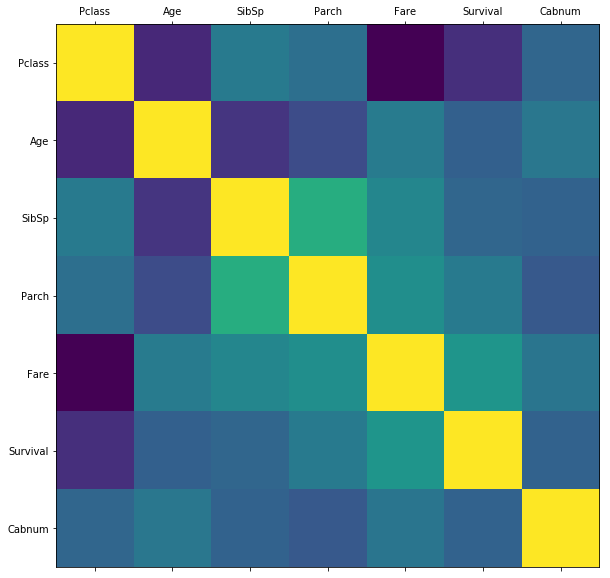

In [415]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

plot_corr(data)

In [416]:
data.corr()

,Pclass,Age,SibSp,Parch,Fare,Survival,Cabnum
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.338481,-0.036776
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.077221,0.066266
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.035322,-0.064264
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225,0.081629,-0.117619
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000,0.257307,0.052416
Survival,-0.338481,-0.077221,-0.035322,0.081629,0.257307,1.000000,-0.063747
Cabnum,-0.036776,0.066266,-0.064264,-0.117619,0.052416,-0.063747,1.000000


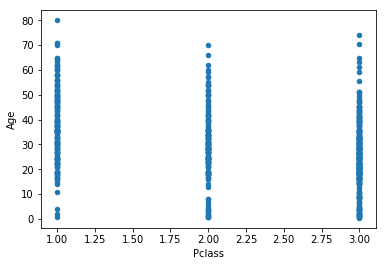

In [417]:
# Why poor correlation between some variables? 
data.plot.scatter('Pclass','Age')

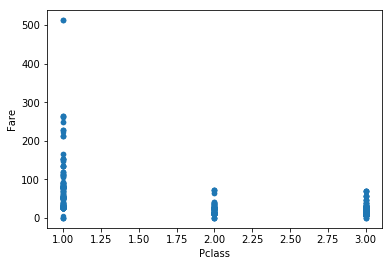

In [418]:
data.plot.scatter('Pclass','Fare')

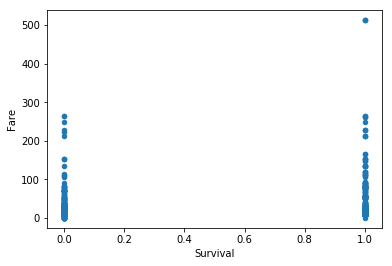

In [419]:
data.plot.scatter('Survival','Fare')

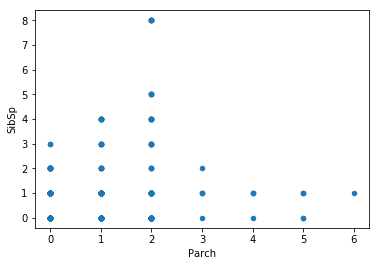

In [420]:
data.plot.scatter('Parch','SibSp')

#### So highest correlation occurs between Parch and SibSp... a new metric for family size may be beneficial here.

### Feature Engineering

#### Here we are interested in generating additional features/ ways of showing data to our algorithms. We'll create a couple of additional features which may be informative to try in our models downstream of here...

#### Feature 1: Child or not. Our distribution of data by age showed a possible group of children which we can define as a new binary feature. 

In [421]:
# If child feature
child =[]
for row in range(len(data)):
    if data['Age'].iloc[row] < 16:
        child.append(1)
    else: 
        child.append(0)

child = pd.Series(child)
data['Child'] = child

# If parentless child feature
parentless = []

for row in range(len(data)):
    if data['Child'].iloc[row] ==1 and data['Parch'].iloc[row] == 0:
        parentless.append(1)
    else: 
        parentless.append(0)
        
parentless = pd.Series(parentless)
data['Parentless'] = parentless

In [422]:
data.Child.value_counts()

0    808
1     83
Name: Child, dtype: int64

In [423]:
data.Parentless.value_counts()

0    880
1     11
Name: Parentless, dtype: int64

#### So we have found 83 children onboard, 11 of which were not with a parent

In [424]:
data.groupby('Child').mean()

,Pclass,Age,SibSp,Parch,Fare,Survival,Cabnum,Parentless
Child,,,,,,,,
0,2.275990,32.767829,0.398515,0.290842,32.144466,0.362624,51.754011,0.00000
1,2.626506,6.369518,1.734940,1.265060,32.785795,0.590361,32.307692,0.13253


In [425]:
data.groupby('Parentless').mean()

,Pclass,Age,SibSp,Parch,Fare,Survival,Cabnum,Child
Parentless,,,,,,,,
0,2.301136,29.961124,0.523864,0.386364,32.444189,0.379545,50.49,0.081818
1,2.909091,12.954545,0.454545,0.000000,13.005700,0.727273,NaN,1.000000


#### So here we have found with these features that parentless children were actually more likely to survive than the average child, which may be a helpful feature...

In [426]:
#### Next we'll look at family sizes
data['FamilySize'] = data.SibSp.values + data.Parch.values + 1

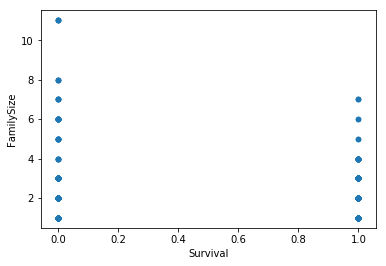

In [427]:
data.plot.scatter('Survival','FamilySize')

#### So family size might provide some value...

### Generating a model

#### First we'll create a baseline Random Forest model using only the data given to us without additional feature engineering.

In [428]:
# Generate numeric basemodel dataset
basemodel_data = raw_data.copy(deep = False)
del basemodel_data['PassengerId']
del basemodel_data['Name']
del basemodel_data['Ticket']
del basemodel_data['Cabin']

base_outcome = basemodel_data['Survived']
del basemodel_data['Survived']

basemodel_data = pd.get_dummies(basemodel_data, columns=['Sex', 'Embarked'])

In [429]:
# Impute missing values using simple mean
from sklearn.preprocessing import Imputer
imp_base = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp_base.fit(basemodel_data)
basemodel_data = imp_base.transform(basemodel_data)

In [430]:
# Create Random Forest model and test
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(basemodel_data, base_outcome, test_size=0.15, random_state=0)
base_model_rf = RandomForestClassifier(random_state=0)
base_model_rf.fit(X_train, y_train)
base_model_rf.score(X_test, y_test)

0.7910447761194029

In [431]:
# Create an XGboost model and test
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

base_model_XG = GradientBoostingClassifier(random_state=0)
base_model_XG.fit(X_train, y_train)
base_model_XG.score(X_test, y_test)

0.8283582089552238

#### So in the base case (without any sort of cross validation) Random Forest and XGBoost have accuracy levels of 0.79 and 0.82. We will work from these values to see if we can increase the scores. 

In [432]:
# Generate Data Set
alt_data = data.copy(deep = False)
del alt_data['Ticket']
del alt_data['Name']
del alt_data['Cabin']
del alt_data['Cabnum']

alt_outcome = alt_data['Survival']
del alt_data['Survival']

alt_data = pd.get_dummies(alt_data, columns=['Sex', 'Embarked','preticket','Title','Deck'])
alt_data.head()
alt_data.to_csv('Training_Data_prior_names.csv')

In [433]:
# Impute missing values via KNN 
from fancyimpute import KNN  
alt_data = KNN(k=3).complete(alt_data)
alt_data = pd.DataFrame(alt_data)

Imputing row 1/891 with 0 missing, elapsed time: 0.170
Imputing row 101/891 with 0 missing, elapsed time: 0.172
Imputing row 201/891 with 0 missing, elapsed time: 0.173
Imputing row 301/891 with 1 missing, elapsed time: 0.173
Imputing row 401/891 with 0 missing, elapsed time: 0.174
Imputing row 501/891 with 0 missing, elapsed time: 0.175
Imputing row 601/891 with 0 missing, elapsed time: 0.176
Imputing row 701/891 with 0 missing, elapsed time: 0.177
Imputing row 801/891 with 0 missing, elapsed time: 0.178


In [434]:
## Export to CSV
alt_data.to_csv('Training_Data.csv')

In [435]:
X_train, X_test, y_train, y_test = train_test_split(alt_data, alt_outcome, test_size=0.15, random_state=0)
alt_model_rf = RandomForestClassifier(random_state=0)
alt_model_rf.fit(X_train, y_train)
alt_model_rf.score(X_test, y_test)

0.7835820895522388

In [436]:
alt_model_XG = GradientBoostingClassifier(random_state=0)
alt_model_XG.fit(X_train, y_train)
alt_model_XG.score(X_test, y_test)

0.8059701492537313

#### So our model got slightly worse with the introduction of the additional features. We will next try to improve on this via feature selction in a hyperparameter optimization

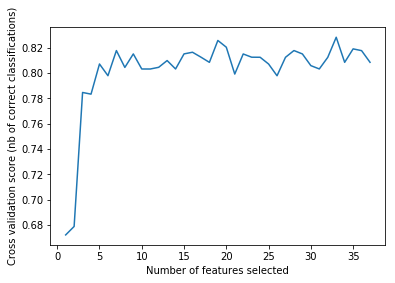

In [437]:
# Analyze number of features for Random Forest classifier using cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

alt_model_rf = RandomForestClassifier(random_state=0)
alt_model_rf.fit(X_train, y_train)
alt_model_rf.score(X_test, y_test)

# Find optimal number of features
slr = RFECV(alt_model_rf, step=1, cv=StratifiedKFold(4), scoring = 'accuracy')
slr.fit(X_train,y_train)
    
# Plot Results
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(slr.grid_scores_) + 1), slr.grid_scores_)
plt.show()

#### So there is a general cutoff of the top number of features involved here, we can do additional hyperparameter optimization to determine best fit scenarios for both the random forest and XGboost algorithms:

In [438]:
# Hyperparameter optimization of Random Forest Algorithm 
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import StratifiedKFold

param_grid = {"max_depth": [8, 6, 3, 1, None],
              "max_features": [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 15, None],
              "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 10],
              "min_samples_leaf": [1, 3, 5, 7, 9, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
grid = RandomizedSearchCV(estimator=alt_model_rf, param_distributions=param_grid, n_iter=100, cv=StratifiedKFold(4))
grid.fit(X_test, y_test)
print(grid.best_score_)
print(grid.best_estimator_.max_features)

0.8283582089552238
7


In [439]:
# Hyperparameter optimization of XGboost
param_grid = {"max_depth": [8, 6, 3, 1, None],
              "max_features": [5, 6, 7, 8, 9, 11, 13, 15, None],
              "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 10],
              "min_samples_leaf": [1, 3, 5, 7, 9, 10]}
grid = RandomizedSearchCV(estimator=alt_model_XG, param_distributions=param_grid, n_iter=100, cv=StratifiedKFold(4))
grid.fit(X_test, y_test)
print(grid.best_score_)
print(grid.best_estimator_.max_features)

0.835820895522388
7


In [440]:
grid.best_params_

{'max_depth': 3,
 'max_features': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

### Analyze uknown data for Kaggle

In [448]:
# Load data
final_data = pd.read_csv('/Users/jimmy/Desktop/Titanic/Testing_Data_Corrected.csv')

In [449]:
# Predict based on XGBoost
answers = pd.Series(grid.predict(final_data))

In [450]:
answers.to_csv('Output2.csv')